# 教学视频
https://www.youtube.com/watch?v=GB9ByFAIAH4

numpy是一个多维数组库,用于存储各种数据和不同维度的数组

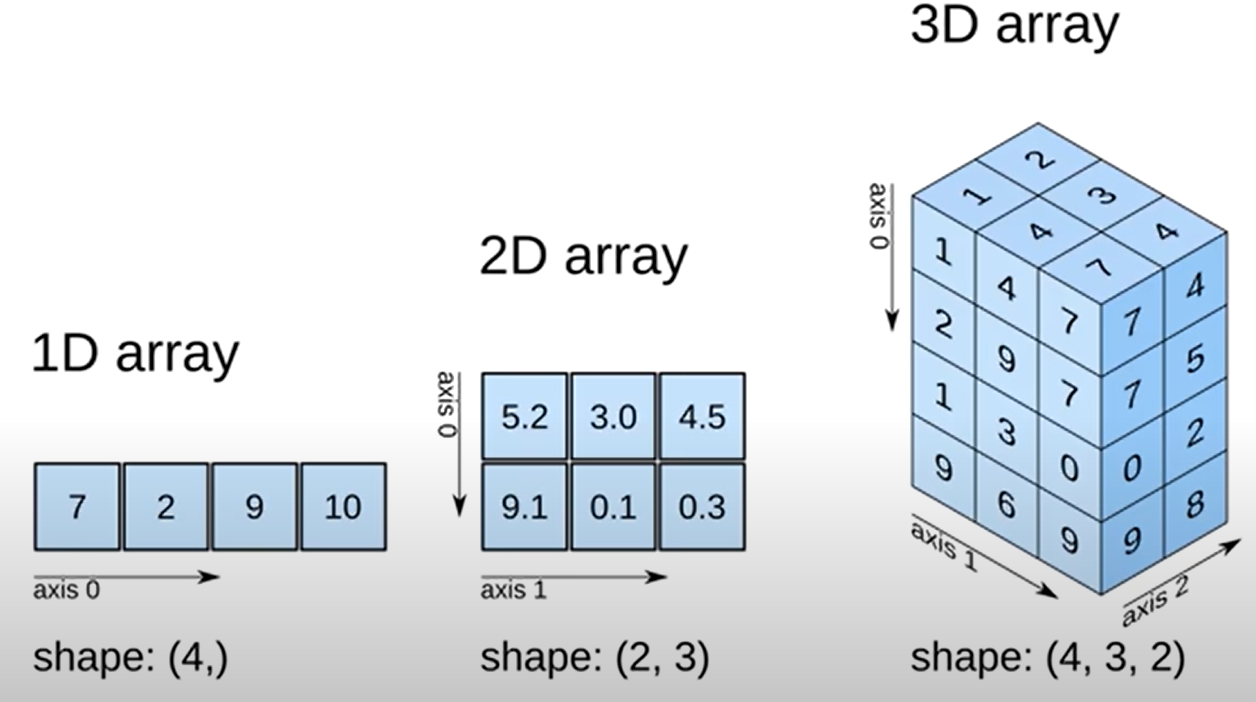

SO, 为什么不直接使用列表List而用numpy呢？

    ⭐speed: numpy > List
        numpy使用固定类型来存储数据,即数组中的所有元素必须是相同的数据类型.
            ·read less bytes of memory
            ·no type checking when iterating through objects
    ⭐连续的Memory:
        numpy采用连续存储,而List是分散存储
            ·SIMD Vector Processing并行计算技术,一条指令可同时对多个数据进行操作,将data打包成vector进行操作.
            ·effective Cache Utilization,缓存的读取比内存更快,把数据加载到缓存更快更便利.
    ⭐function:
        List能实现的numpy也能实现,在numpy上可以实现加减乘除操作,而List不允许

Speed Reason
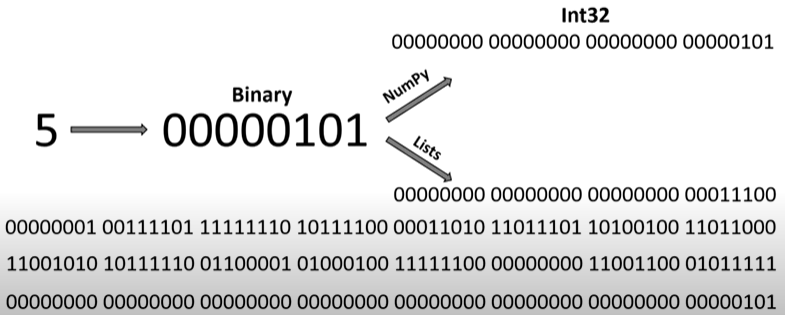
    
    
        计算机以Byte为单位读取info,使用numpy时, number 5 会默认转为由4个Byte组成的int32类型,因此它占用4个字节的内存空间,同时表示它为5. (不指定存储类型默认int32)
        而List在读取info时,采用的是python内置的存储类型,每个元素实际上是一个指向Python对象的指针,每个python对象在内存中都有自己的元数据,分别是Size,Reference Count,Object Type,Object Value; 那么如果要存储一个number 5 到内存中,就需要额外的空间.
        综上所述:numpy所需读取的bytes更少,速度就明显的提高了.
        另外, 由于Numpy所有元素的类型都相同,那么它的迭代器就无需进行类型检查,所以速度更高效.

Contiguous Reason
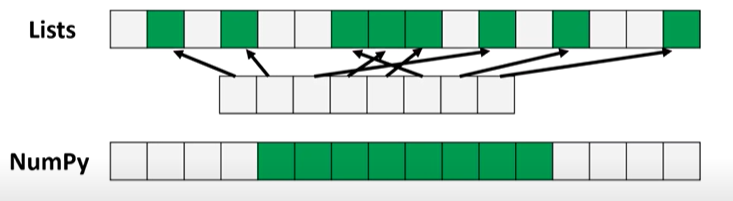

        python的List并不是直接存储数据,而是存储'指向该数据的指针',存储在内存中是分散的,即访问效率低.
        而numpy的所有元素在内存中是连续存储的,同时以某种方式存储该内存的起始位置、存储总大小、存储类型;但是访问效率依然比List快.

In [35]:
import numpy as np

**The Basics**   --Initialize array初始化数组

In [44]:
# the List method
a = []
a = [1,2,3]
a = [[1,2],[3,4],[5,6]] 
print(a)

[[1, 2], [3, 4], [5, 6]]


In [73]:
# the numpy method
a = np.array([]) #创建一个空的numpy数组
a = np.array([1,2,3]) #创建并初始化一个numpy数组
b = np.array([[7.2,1.3],[6.4,8.8]]) #创建多维numpy数组
c = np.array([1,2,4], dtype='int16') #可以指定数组的类型,默认int32


a = np.append(a,[1,23])  #可以通过np.append()方法添加元素,可以迭代对象; 但并非原地修改数组,而是返回一个新的array.


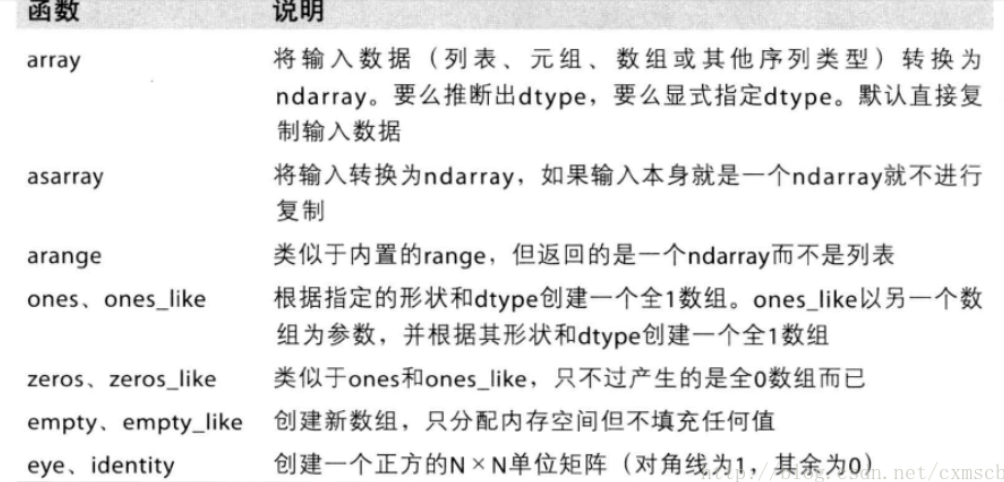

In [150]:
# All 0s matrix
m = np.zeros([2,3]) #参数表示创新数组的大小,而非值

#All 1s matrix
m = np.ones([3,4])

array([[0., 0., 0.],
       [0., 0., 0.]])

In [166]:
# All onther_value matrix 创建全数值数组
m = np.full([3,3],6) # 先制定大小再指定数值,  后续也可以指定数据类型

# full_like
m = np.full_like(a,3)

array([[3, 3, 3, 3, 3, 3, 3],
       [3, 3, 3, 3, 3, 3, 3]])

In [182]:
# Random decimal numbers用于生成随机数的函数
np.random.rand(3,2,2) #返回一个或多个服从均匀分布 [raw, column, deep,....]

# Random Integer values用于生成随机整数的函数(范围是low-high)
np.random.randint(7,size=(4,5)) # [low,high,size=()]  下限默认是0,上限必须指定

array([[4, 1, 6, 3, 3],
       [0, 1, 6, 5, 6],
       [5, 5, 6, 2, 3],
       [4, 6, 2, 3, 0]])

In [186]:
# identify matrix or the eye matrix 单位矩阵
np.identity(5)
np.eye(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [188]:
# repeat matrix
arr = np.array([1,2,3])
r1 = np.repeat(arr,3,axis=0) # np.repeat(所需重复的数组, 重复次数, axis=) 0表示行,1表示列 
r1

array([1, 1, 1, 2, 2, 2, 3, 3, 3])

**Get Info About Array**

In [81]:
# Get Dimension
b.ndim #获取数组的维度,例如3*3*2是三维  空数组也是1维

2

In [83]:
#Get shape
a.shape  #获取数组的大小,形状, 例如(3,)表示一维数组,有5个元素; (2,3)表示两行三列

(5,)

In [101]:
#Get type
b.dtype #获取数组的类型,默认int32

dtype('float64')

In [103]:
#Get total size
b.size #返回数组中元素的总数;一维返回的是总长度; 多维返回的是所有维度大小的乘积;可判断数组是否为空

b.itemsize #数组中每个元素的字节大小

b.nbytes #数组占用内存的总字节数

32

In [115]:
# Get a specific element [row, coloumn]
b[0,1] #获取数组中的注定元素值;  也可以负数表示, -1表示最后一个选项

1.3

In [ ]:
#像列表一样,利用切片进行索引, 这里表示第1行的所有元素
#Get a specific row 获取指定行
b[0, : ] #

#Get a specific coloumn获取指定列
b[:, 0] #

# [start_index : end_index : stepsize] 
 

In [135]:
# 由外层向内层逐层进行索引
b = np.array([[[1,2],[3,4]],[[5,6],[7,8]]])
b[0,1,1]

4

### Changing specific elements,rows,columns,etc 改操作

In [111]:
a = np.array([[1,2,3,4,5,6,7],[8,9,10,11,12,13,14]])

In [123]:
# change specific value
a[1,5]=20 # 索引特定位置进行值修改 
a[:,2] = [50,30] # 切片的魅力!
a

array([[ 1,  2, 50,  4,  5,  6,  7],
       [ 8,  9, 30, 11, 12, 20, 14]])

In [139]:
# 由外层向内层, 替换的尺寸必须相同,否则报错
b = np.array([[[1,2],[3,4]],[[5,6],[7,8]]])
b[ : ,1, :] = [[9,9],[8,8]]
b

array([[[1, 2],
        [9, 9]],

       [[5, 6],
        [8, 8]]])

### Mathematics 数学

官方参考文档
https://numpy.org/doc/stable/reference/routines.math.html

In [191]:
a = np.array([1,2,3,4])

In [ ]:
# simply calculation
a + 2  #[3,4,5,6]
a - 2  #[-1,0,1,2]
a * 2  #[2,4,6,8]
a / 2  #[0.5,1,1.5,2]

In [ ]:
# calculation between matrixs
a = np.array([1,2,3,4])
b = np.array([1,0,1,0])

a + b #[2,2,4,4]
a - b #[0,2,2,4]
a ** 2  #[1,4,9,16]

In [ ]:
# trigonometric三角函数
np.sin(a)
np.cos(a)
np.tan(a)

### Linear Algebra线性代数

官方文档
https://numpy.org/doc/stable/reference/routines.linalg.html

In [203]:
a = np.ones((2,3))
b = np.full((3,2),2)

In [211]:
# matrix multiplication矩阵相乘
c = np.matmul(a,b)
print(c)

[[6. 6.]
 [6. 6.]]


In [209]:
#find the determinant 计算行列式
np.linalg.det(c)

0.0

### Statistics 统计

In [219]:
stats = np.array([[1,2,3],[4,5,6]])

In [225]:
#min,max  [array, axis]
 
np.min(stats) #没有指定axis就是数组中的所有元素   result = 1
np.min(stats,axis=0) #沿着行方向计算最小值,即每列的最小值   (第一列最小是1,第二列最小是2，第二列最小是3) result[1,2,3]
np.min(stats,axis=1) #沿着列方向就按最小值,即每行的最小值   (第一行最小是1，第二行最小是4) result[1,4]

#max函数同理

array([1, 4])

In [229]:
# sum
np.sum(stats) #所有元素加起来 result = 21
np.sum(stats, axis=0) #每列元素加起来 result = [5, 7, 9]
np.sum(stats, axis=1) #每行元素加起来 result = [6, 15]

array([ 6, 15])

### Reoganizing Arrays 数组重组

In [236]:
before = np.array([[1,2,3,4],[5,6,7,8]])
print(before)

[[1 2 3 4]
 [5 6 7 8]]


In [264]:
#改变数组形状  [要改变的数组, 改变后的尺寸, 数据在内存中的存储顺序] = [a, new_shape, order]
after = np.reshape(before,(8,1)) #变成8*1
print(after,'\n')
after = np.reshape(before,(4,2), order='c')  # order = 'c' 按行优先存储
print(after,'\n')
after = np.reshape(before,(4,2), order='f')  # order = 'f' 按列优先存储
print(after,'\n')
after = np.reshape(before,(4,2), order='a')  # 保持原数组的存储顺序

[[1]
 [2]
 [3]
 [4]
 [5]
 [6]
 [7]
 [8]] 

[[1 2]
 [3 4]
 [5 6]
 [7 8]] 

[[1 3]
 [5 7]
 [2 4]
 [6 8]] 



In [276]:
# Vertically stacking vectors 垂直堆叠矢量
# 将多个一维数组按行方向堆叠在一起形成二维数组
v1 = np.array([1,2,3,4])
v2 = np.array([5,6,7,8])
print(np.vstack([v1,v2]),'\n')  # np.vstack([array1,array2,.......])  用[]括起来


# Horizontal stacking vectors 水平堆叠矢量
print(np.hstack([v1,v2])) # np.hstack([array1,array2,.......])

[[1 2 3 4]
 [5 6 7 8]] 

[1 2 3 4 5 6 7 8]
